In [75]:
!pip3 install gym --upgrade

In [77]:
!pip3 install stable_baselines3 --upgrade

In [71]:
!pip3 uninstall gym

Found existing installation: gym 0.26.2
Uninstalling gym-0.26.2:
  Would remove:
    /Users/joykwok/anaconda3/lib/python3.11/site-packages/gym-0.26.2.dist-info/*
    /Users/joykwok/anaconda3/lib/python3.11/site-packages/gym/*
Proceed (Y/n)? ^C
ERROR: Operation cancelled by user


In [12]:
!pip3 install stable_baselines3 matplotlib gym-anytrading

In [105]:
import gymnasium as gym
import gym_anytrading

# Stable baselines
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3 import A2C


# Processing Libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [106]:
df = pd.read_csv('gmedata.csv')

In [107]:
df.head()

,Date,Open,High,Low,Close,Volume
0,12/03/2021,45.25,45.98,39.76,43.10,"16,386,752"
1,12/02/2021,46.25,46.86,43.27,45.39,"8,348,400"
2,12/01/2021,49.85,50.03,44.25,44.96,"9,422,140"
3,11/30/2021,50.03,50.99,47.00,49.05,"6,895,796"
4,11/29/2021,51.00,51.98,50.24,50.50,"4,435,376"


In [108]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [109]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2021-12-03,45.25,45.98,39.76,43.10,"16,386,752"
2021-12-02,46.25,46.86,43.27,45.39,"8,348,400"
2021-12-01,49.85,50.03,44.25,44.96,"9,422,140"
2021-11-30,50.03,50.99,47.00,49.05,"6,895,796"
2021-11-29,51.00,51.98,50.24,50.50,"4,435,376"


In [110]:
env = gym.make('stocks-v0',df=df,frame_bound=(10,100),window_size=5)

In [111]:
env.signal_features

/Users/joykwok/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.signal_features to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.signal_features` for environment variables or `env.get_wrapper_attr('signal_features')` that will search the reminding wrappers.
  logger.warn(


array([[ 4.993e+01,  0.000e+00],
       [ 5.295e+01,  3.020e+00],
       [ 5.348e+01,  5.300e-01],
       [ 6.189e+01,  8.410e+00],
       [ 5.720e+01, -4.690e+00],
       [ 5.253e+01, -4.670e+00],
       [ 5.250e+01, -3.000e-02],
       [ 5.180e+01, -7.000e-01],
       [ 5.229e+01,  4.900e-01],
       [ 5.053e+01, -1.760e+00],
       [ 5.108e+01,  5.500e-01],
       [ 4.980e+01, -1.280e+00],
       [ 5.165e+01,  1.850e+00],
       [ 5.466e+01,  3.010e+00],
       [ 5.331e+01, -1.350e+00],
       [ 5.446e+01,  1.150e+00],
       [ 5.458e+01,  1.200e-01],
       [ 5.175e+01, -2.830e+00],
       [ 5.002e+01, -1.730e+00],
       [ 4.588e+01, -4.140e+00],
       [ 4.571e+01, -1.700e-01],
       [ 4.338e+01, -2.330e+00],
       [ 4.446e+01,  1.080e+00],
       [ 4.349e+01, -9.700e-01],
       [ 4.245e+01, -1.040e+00],
       [ 4.543e+01,  2.980e+00],
       [ 4.613e+01,  7.000e-01],
       [ 4.670e+01,  5.700e-01],
       [ 4.651e+01, -1.900e-01],
       [ 4.582e+01, -6.900e-01],
       [ 4

## 2. Build Environment

In [112]:
env.action_space

Discrete(2)

info {'total_reward': -28.770008087158203, 'total_profit': 0.4281331841974432, 'position': <Positions.Long: 1>}


/Users/joykwok/anaconda3/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.render_all to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.render_all` for environment variables or `env.get_wrapper_attr('render_all')` that will search the reminding wrappers.
  logger.warn(


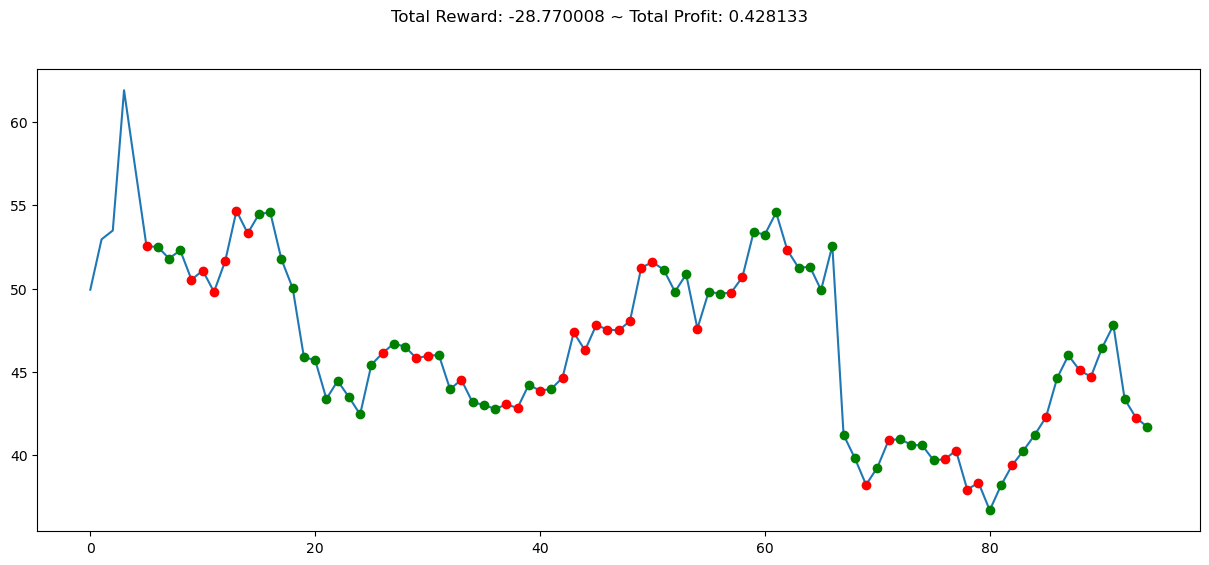

In [113]:
#running the test environment
state = env.reset()
while True: 
    action = env.action_space.sample()
    input, n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [140]:
#setting up our environment for training 
env_maker = lambda: gym.make('stocks-v0', df=df, frame_bound=(5,100), window_size=5)
env = DummyVecEnv([env_maker])

In [141]:
#Applying the Trading RL Algorithm
model = A2C('MlpPolicy', env, verbose=1) 

#setting the learning timesteps
model.learn(total_timesteps=100000)

Using cpu device
------------------------------------
| time/                 |          |
|    fps                | 579      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.361   |
|    explained_variance | 0.000784 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -4.07    |
|    value_loss         | 18       |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 577      |
|    iterations         | 200      |
|    time_elapsed       | 1        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.338   |
|    explained_variance | 0.722    |
|    learning_rate      | 0.0007   |
|    n_updates          | 199      |
|    policy_loss        | -0.716   |
|    value_loss      

------------------------------------
| time/                 |          |
|    fps                | 610      |
|    iterations         | 1700     |
|    time_elapsed       | 13       |
|    total_timesteps    | 8500     |
| train/                |          |
|    entropy_loss       | -0.00257 |
|    explained_variance | 0.0734   |
|    learning_rate      | 0.0007   |
|    n_updates          | 1699     |
|    policy_loss        | 6.36e-08 |
|    value_loss         | 6.28e-08 |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 615       |
|    iterations         | 1800      |
|    time_elapsed       | 14        |
|    total_timesteps    | 9000      |
| train/                |           |
|    entropy_loss       | -0.00114  |
|    explained_variance | -1.95     |
|    learning_rate      | 0.0007    |
|    n_updates          | 1799      |
|    policy_loss        | -1.68e-09 |
|    value_loss         | 

------------------------------------
| time/                 |          |
|    fps                | 635      |
|    iterations         | 3300     |
|    time_elapsed       | 25       |
|    total_timesteps    | 16500    |
| train/                |          |
|    entropy_loss       | -0.00114 |
|    explained_variance | -0.00954 |
|    learning_rate      | 0.0007   |
|    n_updates          | 3299     |
|    policy_loss        | 1.4e-08  |
|    value_loss         | 1.84e-08 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 638      |
|    iterations         | 3400     |
|    time_elapsed       | 26       |
|    total_timesteps    | 17000    |
| train/                |          |
|    entropy_loss       | -0.00114 |
|    explained_variance | -0.132   |
|    learning_rate      | 0.0007   |
|    n_updates          | 3399     |
|    policy_loss        | 7.4e-08  |
|    value_loss         | 5.26e-07 |
-

-------------------------------------
| time/                 |           |
|    fps                | 659       |
|    iterations         | 4900      |
|    time_elapsed       | 37        |
|    total_timesteps    | 24500     |
| train/                |           |
|    entropy_loss       | -0.000499 |
|    explained_variance | 0.141     |
|    learning_rate      | 0.0007    |
|    n_updates          | 4899      |
|    policy_loss        | -4.06e-09 |
|    value_loss         | 9.67e-09  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 661       |
|    iterations         | 5000      |
|    time_elapsed       | 37        |
|    total_timesteps    | 25000     |
| train/                |           |
|    entropy_loss       | -0.000499 |
|    explained_variance | -0.0808   |
|    learning_rate      | 0.0007    |
|    n_updates          | 4999      |
|    policy_loss        | -2.53e-08 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 683       |
|    iterations         | 6500      |
|    time_elapsed       | 47        |
|    total_timesteps    | 32500     |
| train/                |           |
|    entropy_loss       | -0.000499 |
|    explained_variance | 0.00254   |
|    learning_rate      | 0.0007    |
|    n_updates          | 6499      |
|    policy_loss        | -5.43e-08 |
|    value_loss         | 1.75e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 684       |
|    iterations         | 6600      |
|    time_elapsed       | 48        |
|    total_timesteps    | 33000     |
| train/                |           |
|    entropy_loss       | -0.000499 |
|    explained_variance | 0.0137    |
|    learning_rate      | 0.0007    |
|    n_updates          | 6599      |
|    policy_loss        | -2.18e-09 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 698       |
|    iterations         | 8100      |
|    time_elapsed       | 58        |
|    total_timesteps    | 40500     |
| train/                |           |
|    entropy_loss       | -0.000499 |
|    explained_variance | -0.124    |
|    learning_rate      | 0.0007    |
|    n_updates          | 8099      |
|    policy_loss        | 1.16e-08  |
|    value_loss         | 8.12e-08  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 696       |
|    iterations         | 8200      |
|    time_elapsed       | 58        |
|    total_timesteps    | 41000     |
| train/                |           |
|    entropy_loss       | -0.000499 |
|    explained_variance | -0.0999   |
|    learning_rate      | 0.0007    |
|    n_updates          | 8199      |
|    policy_loss        | 4.52e-09  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 705       |
|    iterations         | 9700      |
|    time_elapsed       | 68        |
|    total_timesteps    | 48500     |
| train/                |           |
|    entropy_loss       | -0.000218 |
|    explained_variance | 0.0913    |
|    learning_rate      | 0.0007    |
|    n_updates          | 9699      |
|    policy_loss        | -3.34e-09 |
|    value_loss         | 4.05e-08  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 706       |
|    iterations         | 9800      |
|    time_elapsed       | 69        |
|    total_timesteps    | 49000     |
| train/                |           |
|    entropy_loss       | -0.000218 |
|    explained_variance | 0.00286   |
|    learning_rate      | 0.0007    |
|    n_updates          | 9799      |
|    policy_loss        | 1.77e-09  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 715       |
|    iterations         | 11300     |
|    time_elapsed       | 78        |
|    total_timesteps    | 56500     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | -0.000315 |
|    learning_rate      | 0.0007    |
|    n_updates          | 11299     |
|    policy_loss        | -6.69e-09 |
|    value_loss         | 1.74e-07  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 715       |
|    iterations         | 11400     |
|    time_elapsed       | 79        |
|    total_timesteps    | 57000     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | -0.0238   |
|    learning_rate      | 0.0007    |
|    n_updates          | 11399     |
|    policy_loss        | -5.08e-09 |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 719       |
|    iterations         | 12900     |
|    time_elapsed       | 89        |
|    total_timesteps    | 64500     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | -0.00146  |
|    learning_rate      | 0.0007    |
|    n_updates          | 12899     |
|    policy_loss        | 3.64e-09  |
|    value_loss         | 4.9e-08   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 719       |
|    iterations         | 13000     |
|    time_elapsed       | 90        |
|    total_timesteps    | 65000     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | 0.00368   |
|    learning_rate      | 0.0007    |
|    n_updates          | 12999     |
|    policy_loss        | 4.54e-09  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 718       |
|    iterations         | 14500     |
|    time_elapsed       | 100       |
|    total_timesteps    | 72500     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | -0.000264 |
|    learning_rate      | 0.0007    |
|    n_updates          | 14499     |
|    policy_loss        | 8.69e-09  |
|    value_loss         | 2.8e-07   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 718       |
|    iterations         | 14600     |
|    time_elapsed       | 101       |
|    total_timesteps    | 73000     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | 0.00541   |
|    learning_rate      | 0.0007    |
|    n_updates          | 14599     |
|    policy_loss        | 7.73e-09  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 723       |
|    iterations         | 16100     |
|    time_elapsed       | 111       |
|    total_timesteps    | 80500     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | -0.0279   |
|    learning_rate      | 0.0007    |
|    n_updates          | 16099     |
|    policy_loss        | 7.14e-09  |
|    value_loss         | 1.9e-07   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 723       |
|    iterations         | 16200     |
|    time_elapsed       | 111       |
|    total_timesteps    | 81000     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | 0.000935  |
|    learning_rate      | 0.0007    |
|    n_updates          | 16199     |
|    policy_loss        | 7.75e-09  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 726       |
|    iterations         | 17700     |
|    time_elapsed       | 121       |
|    total_timesteps    | 88500     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | 0.00469   |
|    learning_rate      | 0.0007    |
|    n_updates          | 17699     |
|    policy_loss        | 2.65e-09  |
|    value_loss         | 2.6e-08   |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 725       |
|    iterations         | 17800     |
|    time_elapsed       | 122       |
|    total_timesteps    | 89000     |
| train/                |           |
|    entropy_loss       | -0.000218 |
|    explained_variance | 0.357     |
|    learning_rate      | 0.0007    |
|    n_updates          | 17799     |
|    policy_loss        | 1.31e-09  |
|    value_l

-------------------------------------
| time/                 |           |
|    fps                | 727       |
|    iterations         | 19300     |
|    time_elapsed       | 132       |
|    total_timesteps    | 96500     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | 0.00228   |
|    learning_rate      | 0.0007    |
|    n_updates          | 19299     |
|    policy_loss        | 1.91e-08  |
|    value_loss         | 1.35e-06  |
-------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 727       |
|    iterations         | 19400     |
|    time_elapsed       | 133       |
|    total_timesteps    | 97000     |
| train/                |           |
|    entropy_loss       | -0.000217 |
|    explained_variance | -0.00603  |
|    learning_rate      | 0.0007    |
|    n_updates          | 19399     |
|    policy_loss        | 1.49e-09  |
|    value_l

In [91]:
!pip3 install scikit-learn --upgrade

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/ce/41/5d882544fddba1ae476c240cdf4499743ea84bfeb54456d472966dc86355/scikit_learn-1.4.1.post1-cp311-cp311-macosx_10_9_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 19.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [127]:
import yfinance as yf
import numpy as np

# Define the ticker symbol
ticker = "AAPL"

In [128]:
# Download the historical price data
data = yf.download(ticker, start="2018-01-01", end="2023-10-31")

[*********************100%%**********************]  1 of 1 completed


In [129]:
# Display the first few rows of the data
print(data.head())

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-01-02  42.540001  43.075001  42.314999  43.064999  40.670982  102223600
2018-01-03  43.132500  43.637501  42.990002  43.057499  40.663895  118071600
2018-01-04  43.134998  43.367500  43.020000  43.257500  40.852779   89738400
2018-01-05  43.360001  43.842499  43.262501  43.750000  41.317902   94640000
2018-01-08  43.587502  43.902500  43.482498  43.587502  41.164440   82271200


In [130]:
# Remove missing values from the data
data = data.dropna()

In [131]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

In [132]:
# Convert data_normalized into a pandas DataFrame
data = pd.DataFrame(data_normalized, columns=data.columns)

In [133]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
0,0.040844,0.041069,0.042652,0.046721,0.040814,0.179129
1,0.044541,0.044546,0.046877,0.046674,0.040770,0.219246
2,0.044557,0.042877,0.047065,0.047917,0.041939,0.147525
3,0.045961,0.045813,0.048582,0.050978,0.044817,0.159933
4,0.047381,0.046184,0.049959,0.049968,0.043867,0.128624


In [134]:
# Split the data into training and testing sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

In [137]:
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv

# Define the trading environment
class TradingEnvironment(gym.Env):
    def __init__(self, data):
        self.data = data
        self.action_space = gym.spaces.Discrete(3)  # Buy, Sell, Hold
        self.observation_space = gym.spaces.Box(low=0, high=1, shape=(len(data.columns),))

    def reset(self,seed=None):
        self.current_step = 0
        self.account_balance = 100000  # Initial account balance
        self.shares_held = 0
        self.net_worth = self.account_balance
        self.max_net_worth = self.account_balance

        return self._next_observation()

    def _next_observation(self):
        return self.data.iloc[self.current_step].values

    def step(self, action):
        self._take_action(action)
        self.current_step += 1

        if self.current_step > len(self.data) - 1:
            self.current_step = 0

        return self._next_observation(), self._get_reward(), self.net_worth, {}

    def _take_action(self, action):
        if action == 0:  # Buy
            self.shares_held += self.account_balance / self.data.iloc[self.current_step].values[0]
            self.account_balance -= self.account_balance
        elif action == 1:  # Sell
            self.account_balance += self.shares_held * self.data.iloc[self.current_step].values[0]
            self.shares_held -= self.shares_held

        self.net_worth = self.account_balance + self.shares_held * self.data.iloc[self.current_step].values[0]

        if self.net_worth > self.max_net_worth:
            self.max_net_worth = self.net_worth

    def _get_reward(self):
        return self.net_worth - self.account_balance

# Create the trading environment
env = TradingEnvironment(train_data)

In [138]:
#Applying the Trading RL Algorithm
model = A2C('MlpPolicy', env, verbose=1) 

#setting the learning timesteps
model.learn(total_timesteps=1000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


ValueError: too many values to unpack (expected 2)